# ANOVA and Non-Parametric Tests

**Estimated Time**: ??? <br>
**Module Developer**: James Geronimo

## Table of Contents

1. Introduction <br>
    1.1. Learning Objectives <br>
    1.2. Setup <br>
2. ... <br>
3. ... <br>
4. Conclusion

---

## 1. Introduction

### 1.1. Learning Objectives

In this notebook, you will:
- Understand when to use ANOVA instead of a two-mean test
- Learn how to manually compute ANOVA step-by-step
- Use SciPy’s `stats.f_oneway` as a sanity check
- Visualize housing price differences across different groups

### 1.2. Understanding ANOVA

Why should we use **Analysis of Variance**, a.k.a. ANOVA, instead of a traditional Two-Mean Test? ANOVA is used when comparing **more than two groups**.
- A two-sample t-test only compares **two** group means.
- ANOVA generalizes this to **three or more groups** to determine if at least one differs significantly.
- Example: Comparing house prices across different neighborhoods.

### 1.3. Setup

Below, we have imported some Python libraries that are necessary for this module. Make sure to run this cell before running any other code cells!

In [21]:
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

from ipywidgets import interact, widgets

## 2. Data Preparation

Let's first create a `DataFrame` for our data in a variable named `ames`. We do this by using the `read_csv` function from the `pandas` library. We then use `head(10)` to see the first 10 rows of the data. In other words, we view the "head" of the data.

In [22]:
# Load the dataset
ames = pd.read_csv("anova/AmesHousing.csv")
ames.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


Wow, that's a lot of columns to work with! We are only interested in two columns, namely, `"Neighborhood"` and `"SalePrice"`. Let's go ahead and index into these two columns and update our `ames` DataFrame.

In [23]:
# Select relevant columns
ames = ames[["Neighborhood", "SalePrice"]]
display(ames.head(10))
ames.shape

,Neighborhood,SalePrice
0,NAmes,215000
1,NAmes,105000
2,NAmes,172000
3,NAmes,244000
4,Gilbert,189900
5,Gilbert,195500
6,StoneBr,213500
7,StoneBr,191500
8,StoneBr,236500
9,Gilbert,189000


(2930, 2)

*COMMENTARY HERE* <br> . <br> .

In [24]:
# Filter neighborhoods with enough data
neighborhood_counts = ames["Neighborhood"].value_counts()
selected_neighborhoods = neighborhood_counts[neighborhood_counts > 50].index

ames = ames[ames["Neighborhood"].isin(selected_neighborhoods)]
ames

,Neighborhood,SalePrice
0,NAmes,215000
1,NAmes,105000
2,NAmes,172000
3,NAmes,244000
4,Gilbert,189900
...,...,...
2925,Mitchel,142500
2926,Mitchel,131000
2927,Mitchel,132000
2928,Mitchel,170000


## 3. Visualizing the Data

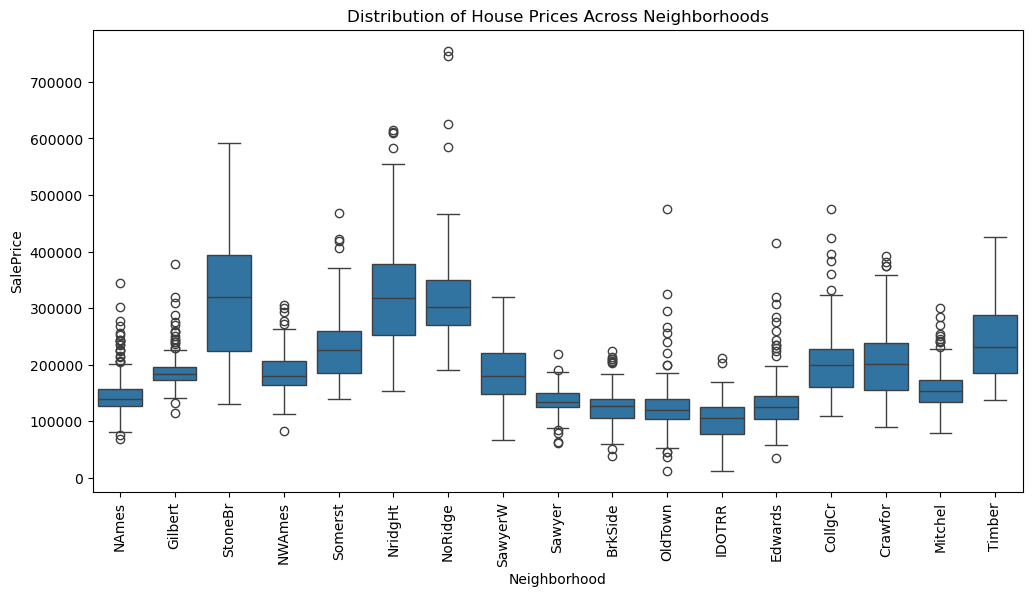

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=ames, x="Neighborhood", y="SalePrice")
plt.xticks(rotation=90)
plt.title("Distribution of House Prices Across Neighborhoods")
plt.show()

## 4. Performing ANOVA

## 5. Sanity Check Using SciPy

## 6. Non-Parametric test: Kruskal-Wallis Test

## 7. Conclusion